In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")

## WT CFTR 

In [22]:
path_W = '../CM_WT/open/clean_energy_breakdown/'
file_list_W = os.listdir(path_W)
print (len(file_list_W))
#del [file_list[0]]
file_list2_W = [path_W+ i for i in file_list_W]
#print(file_list2_W)

2000


In [23]:
dataframes_W=[]

for f in file_list2_W:
    dataframes_W.append(pd.read_table(f, delim_whitespace=True, names=['SCORE','pose_id','resi1','pdbid1','restype1','resi2','pdbid2','restype2','fa_atr','fa_rep','fa_sol','fa_intra_rep','fa_intra_sol_xover4','lk_ball_wtd','fa_elec','pro_close','hbond_sr_bb','hbond_lr_bb','hbond_bb_sc','hbond_sc','dslf_fa13','omega','fa_dun','p_aa_pp','yhh_planarity','ref','rama_prepro','total','description']))
#len(dataframes)

In [24]:
combined_dataframes_W=pd.concat(dataframes_W)
grouped_col1_W=combined_dataframes_W.groupby(['resi1', 'resi2']).mean()
grouped_col1_W.reset_index(inplace=True)
#print (grouped_col1_W)
#grouped_col1.to_csv('../WT_cl_heatmap.csv')

In [25]:
for_heatmap_W=grouped_col1_W[['resi1','resi2','total']]
result_W=for_heatmap_W.pivot(index='resi1', columns='resi2', values='total')
result_W.fillna(0,inplace=True)
#print (result_W)
result_W.to_csv('WT_op_heatmap.csv', index=False)

In [28]:
result_W2 = result_W[[i for i in range(386,604)]][386:604] #NBD1
#result_W2 = result_W[[i for i in range(606,906)]][606:906]
#result_W2 = result_W[[i for i in range(795,814)]][460:478] #ICL4/NBD1 interface
#result_W2 = result_W[[i for i in range(806,807)]][460:478] #1070/NBD1 interface
result_W2 = result_W[[i for i in range(804,811)]][802:809]

In [26]:
result_W2 = pd.read_csv('WT_op_heatmap.csv')

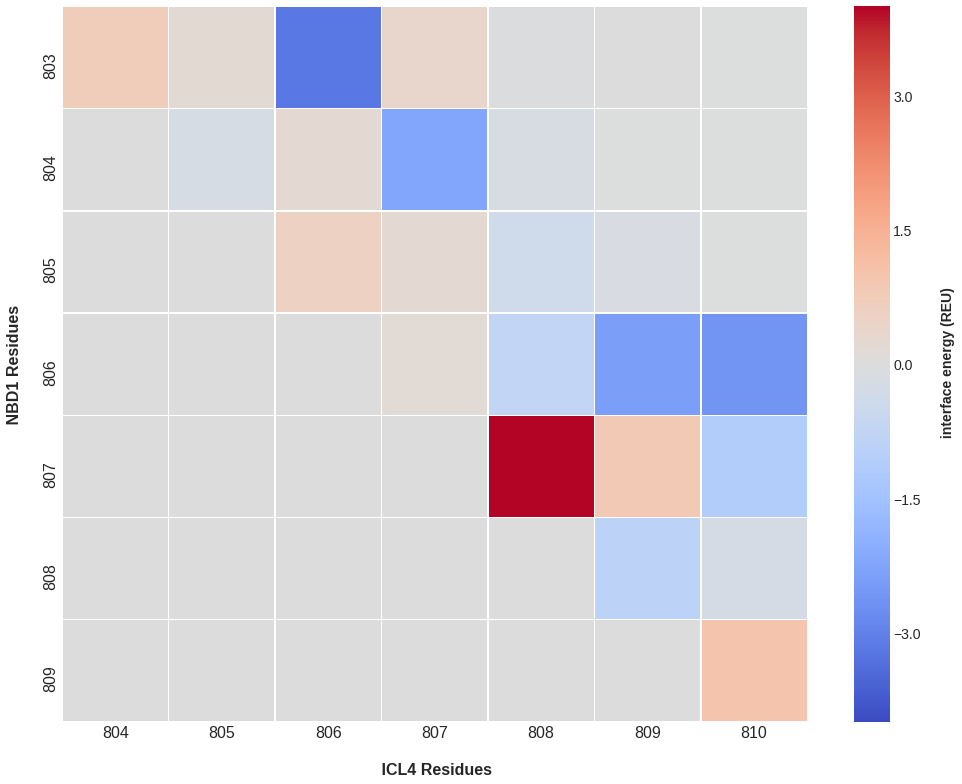

In [29]:
#diverging_colors = sns.color_palette("RdBu", 10)
diverging_colors = sns.color_palette("coolwarm", 10)
fig = plt.figure(figsize=(14,11))
ax=sns.heatmap(result_W2,vmin=-4, vmax=4,xticklabels=1, yticklabels=1, cbar=True,linewidths=.5, annot=False, cmap='coolwarm')
ax.collections[0].colorbar.set_label("\n interface energy (REU)", fontsize='14', fontweight='bold')
plt.xlabel('\n ICL4 Residues', fontsize='16', fontweight='bold')
plt.ylabel(' NBD1 Residues \n', fontsize='16', fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
#sns.heatmap((pd.DataFrame(result.sum(axis=0))).transpose(), ax=ax,  annot=True, cmap="RdBu", cbar=False, xticklabels=False, yticklabels=False)
#plt.title('Homo sapiens, control\n', fontsize='28', fontweight='bold')
plt.tight_layout()
#plt.savefig('../heatmap_IA_control.png')
plt.show()

## F508del CFTR 

In [37]:
path = '../CM_F508del/open/clean_energy_breakdown/'
file_list = os.listdir(path)
print (len(file_list))
#del [file_list[0]]
file_list2 = [path+ i for i in file_list]
#print(file_list2)

2000


In [38]:
dataframes_F=[]

for f in file_list2:
    dataframes_F.append(pd.read_table(f, delim_whitespace=True, names=['SCORE','pose_id','resi1','pdbid1','restype1','resi2','pdbid2','restype2','fa_atr','fa_rep','fa_sol','fa_intra_rep','fa_intra_sol_xover4','lk_ball_wtd','fa_elec','pro_close','hbond_sr_bb','hbond_lr_bb','hbond_bb_sc','hbond_sc','dslf_fa13','omega','fa_dun','p_aa_pp','yhh_planarity','ref','rama_prepro','total','description']))
#len(dataframes)

In [39]:
combined_dataframes_F=pd.concat(dataframes_F)
grouped_col1_F=combined_dataframes_F.groupby(['resi1', 'resi2']).mean()
grouped_col1_F.reset_index(inplace=True)
#print (grouped_col1_F)
#grouped_col1.to_csv('../control_summary.csv')

In [40]:
for_heatmap_F=grouped_col1_F[['resi1','resi2','total']]
result_F=for_heatmap_F.pivot(index='resi1', columns='resi2', values='total')
result_F.fillna(0,inplace=True)
#print (result_F)
result_F.to_csv('F508del_op_heatmap.csv')

In [35]:
#result_F2 = result_F[[i for i in range(386,604)]][386:604] #NBD1
#result_F2 = result_F[[i for i in range(606,906)]][606:906]
#result_F2 = result_F[[i for i in range(797,814)]][457:478] #ICL4/NBD1 interface
#result_F2 = result_F[[i for i in range(797,814)]][490:509] #ICL4/NBD1 interface
result_F2 = result_F[[i for i in range(806,807)]][457:478] #1070/NBD1 interface
#result_F2 = result_F[[i for i in range(804,811)]][803:810]

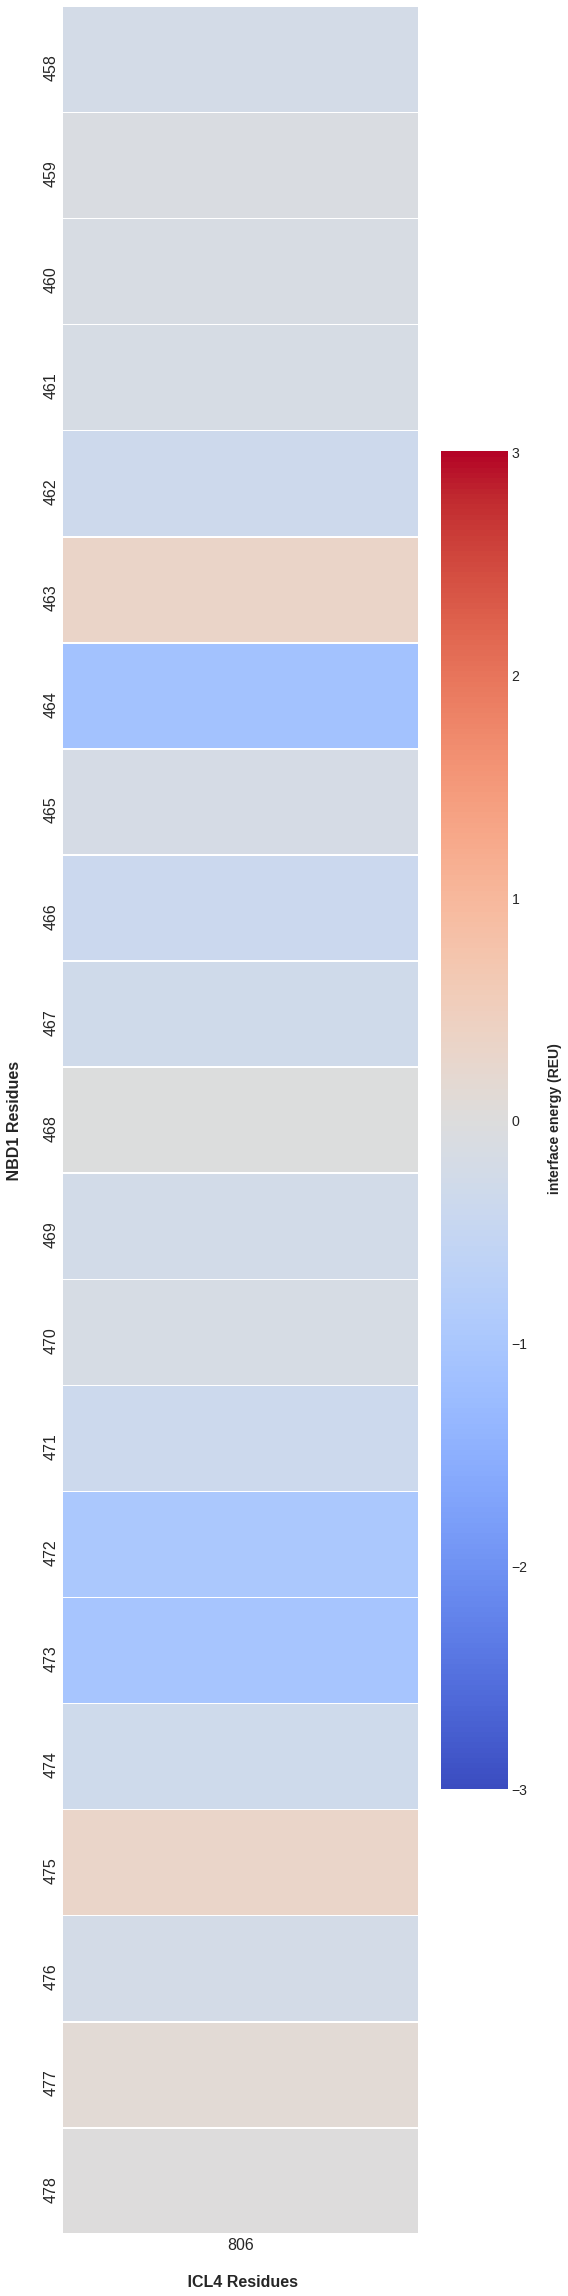

In [36]:
#diverging_colors = sns.color_palette("RdBu", 10)
diverging_colors = sns.color_palette("coolwarm", 10)
fig = plt.figure(figsize=(8,32))
ax=sns.heatmap(result_F2,vmin=-3, vmax=3,xticklabels=1, yticklabels=1, cbar=True,linewidths=.5, annot=False, cmap='coolwarm')
ax.collections[0].colorbar.set_label("\n interface energy (REU)", fontsize='14', fontweight='bold')
plt.xlabel('\n ICL4 Residues', fontsize='16', fontweight='bold')
plt.ylabel(' NBD1 Residues \n', fontsize='16', fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
#sns.heatmap((pd.DataFrame(result.sum(axis=0))).transpose(), ax=ax,  annot=True, cmap="RdBu", cbar=False, xticklabels=False, yticklabels=False)
#plt.title('Homo sapiens, control\n', fontsize='28', fontweight='bold')
plt.tight_layout()
plt.savefig('../figures/1070_NBD_F508del_heatmap.svg', format='svg')
plt.show()

In [33]:
results_diff = result_R2 - result_F2

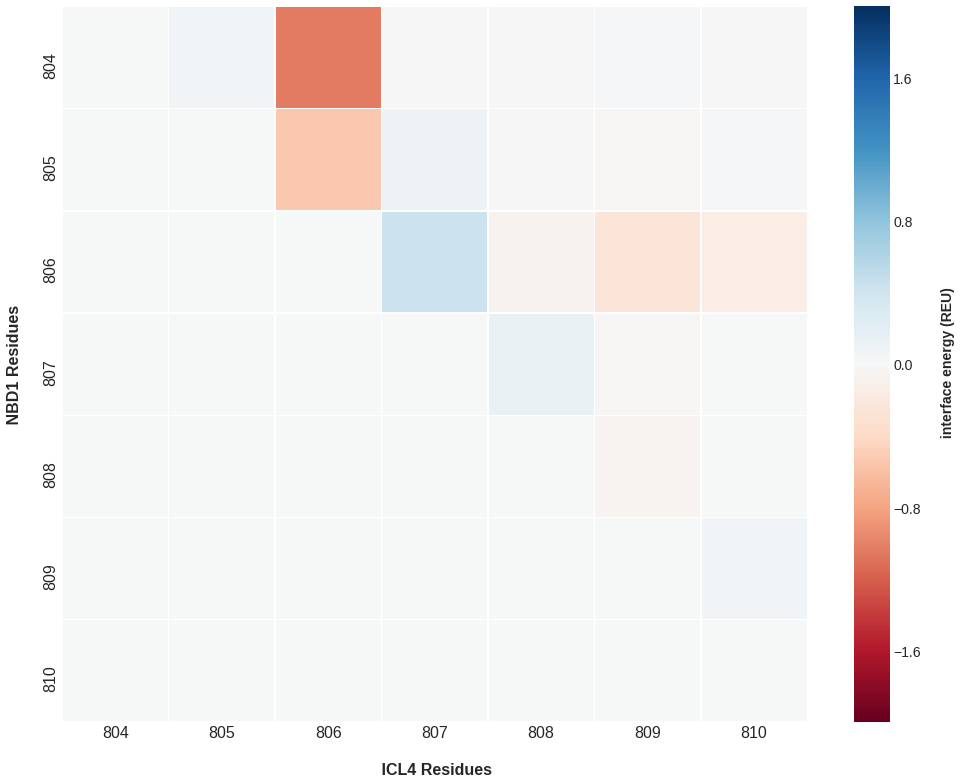

In [29]:
#diverging_colors = sns.color_palette("RdBu", 10)
diverging_colors = sns.color_palette("coolwarm", 10)
fig = plt.figure(figsize=(14,11))
ax=sns.heatmap(results_diff,vmin=-2, vmax=2, xticklabels=1, yticklabels=1, cbar=True, linewidths=.5, annot=False, cmap='RdBu')
ax.collections[0].colorbar.set_label("\n interface energy (REU)", fontsize='14', fontweight='bold')
plt.xlabel('\n ICL4 Residues', fontsize='16', fontweight='bold')
plt.ylabel(' NBD1 Residues \n', fontsize='16', fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)

#sns.heatmap((pd.DataFrame(results_diff.sum(axis=0))).transpose(), ax=ax,  annot=True, cmap="RdBu", cbar=False, xticklabels=False, yticklabels=False)
#plt.title('Homo sapiens, control\n', fontsize='28', fontweight='bold')
plt.tight_layout()
plt.savefig('../figures/ICL4_heatmap.svg', format='svg')
plt.show()

## R1070W F508del CFTR

In [45]:
path = '../CM_R1070W_F508del/open/clean_energy_breakdown/'
file_list = os.listdir(path)
print (len(file_list))
#del [file_list[0]]
file_list2_R = [path+ i for i in file_list]
#print(file_list2_R)

2000


In [46]:
dataframes_R=[]

for f in file_list2_R:
    dataframes_R.append(pd.read_table(f, delim_whitespace=True, names=['SCORE','pose_id','resi1','pdbid1','restype1','resi2','pdbid2','restype2','fa_atr','fa_rep','fa_sol','fa_intra_rep','fa_intra_sol_xover4','lk_ball_wtd','fa_elec','pro_close','hbond_sr_bb','hbond_lr_bb','hbond_bb_sc','hbond_sc','dslf_fa13','omega','fa_dun','p_aa_pp','yhh_planarity','ref','rama_prepro','total','description']))
#len(dataframes)

In [47]:
combined_dataframes_R=pd.concat(dataframes_R)
grouped_col1_R=combined_dataframes_R.groupby(['resi1', 'resi2']).mean()
grouped_col1_R.reset_index(inplace=True)
#print (grouped_col1)
#grouped_col1.to_csv('../control_summary.csv')

In [48]:
for_heatmap_R=grouped_col1_R[['resi1','resi2','total']]
result_R=for_heatmap_R.pivot(index='resi1', columns='resi2', values='total')
result_R.fillna(0,inplace=True)
#print (result)
result_R.to_csv('R1070W_op_heatmap.csv')

In [41]:
#result_R2 = result_R[[i for i in range(804,811)]][802:809]
#result_R2 = result_R[[i for i in range(797,814)]][457:478] #ICL4/NBD1 interface
#result_R2 = result_R[[i for i in range(797,814)]][490:509] #ICL4/NBD1 interface
result_R2 = result_R[[i for i in range(806,807)]][457:478] #1070/NBD1 interface
#result_R2 = result_R[[i for i in range(386,604)]][386:604] #NBD1
#result_R2 = result_R[[i for i in range(606,906)]][606:906] # TMD2

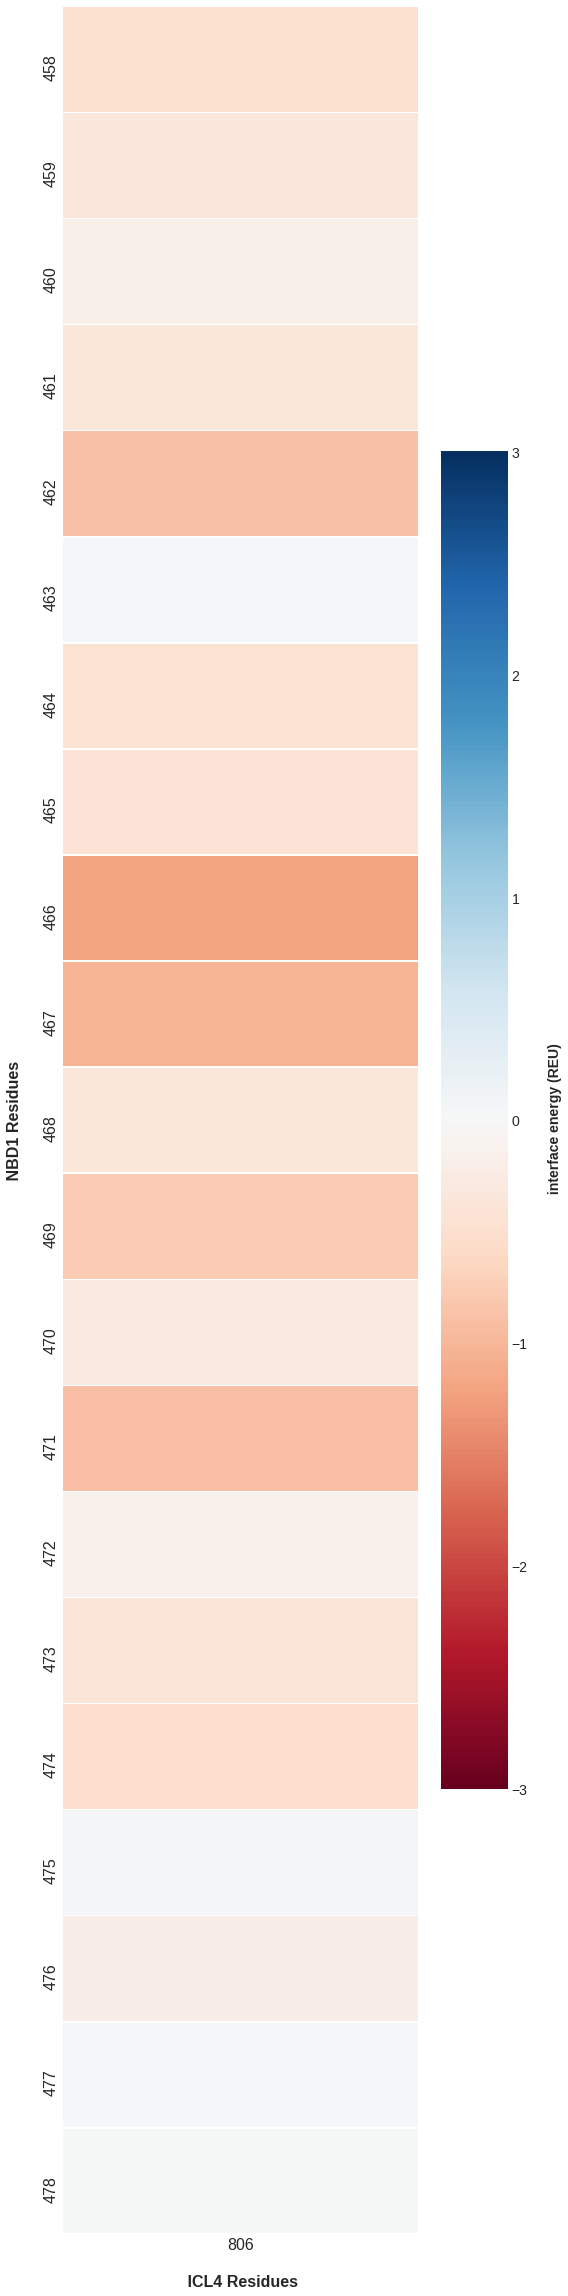

In [45]:
diverging_colors = sns.color_palette("coolwarm", 10)
fig = plt.figure(figsize=(8,32))
ax=sns.heatmap(result_R2,vmin=-3, vmax=3,xticklabels=1, yticklabels=1, cbar=True,linewidths=.5, annot=False, cmap='RdBu')
ax.collections[0].colorbar.set_label("\n interface energy (REU)", fontsize='14', fontweight='bold')
plt.xlabel('\n ICL4 Residues', fontsize='16', fontweight='bold')
plt.ylabel(' NBD1 Residues \n', fontsize='16', fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
#sns.heatmap((pd.DataFrame(result.sum(axis=0))).transpose(), ax=ax,  annot=True, cmap="RdBu", cbar=False, xticklabels=False, yticklabels=False)
#plt.title('Homo sapiens, control\n', fontsize='28', fontweight='bold')
plt.tight_layout()
plt.savefig('../figures/1070_NBD_R1070W_heatmap.svg', format='svg')
plt.show()

## V510D F508del CFTR 

In [55]:
path_V = '../CM_V510D_F508del/open/clean_energy_breakdown/'
file_list_V = os.listdir(path_V)
print (len(file_list_V))
#del [file_list[0]]
file_list2_V = [path_V + i for i in file_list_V]
#print(file_list2_R)

2000


In [56]:
dataframes_V=[]

for f in file_list2_V:
    dataframes_V.append(pd.read_table(f, delim_whitespace=True, names=['SCORE','pose_id','resi1','pdbid1','restype1','resi2','pdbid2','restype2','fa_atr','fa_rep','fa_sol','fa_intra_rep','fa_intra_sol_xover4','lk_ball_wtd','fa_elec','pro_close','hbond_sr_bb','hbond_lr_bb','hbond_bb_sc','hbond_sc','dslf_fa13','omega','fa_dun','p_aa_pp','yhh_planarity','ref','rama_prepro','total','description']))
len(dataframes_V)

2000

In [57]:
combined_dataframes_V=pd.concat(dataframes_V)
grouped_col1_V=combined_dataframes_V.groupby(['resi1', 'resi2']).mean()
grouped_col1_V.reset_index(inplace=True)
#print (grouped_col1)
#grouped_col1.to_csv('../control_summary.csv')

In [58]:
for_heatmap_V=grouped_col1_V[['resi1','resi2','total']]
result_V=for_heatmap_V.pivot(index='resi1', columns='resi2', values='total')
result_V.fillna(0,inplace=True)
#print (result)
result_V.to_csv('V510D_op_heatmap.csv')

In [9]:
#result_V2 = result_V[[i for i in range(804,811)]][803:810]
result_V2 = result_V[[i for i in range(795,814)]][460:478] #ICL4/NBD1 interface
#result_V2 = result_V[[i for i in range(806,807)]][460:478] #1070/NBD1 interface
#result_V2 = result_V[[i for i in range(386,604)]][386:604] #NBD1
#result_V2 = result_V[[i for i in range(606,906)]][606:906] # TMD2

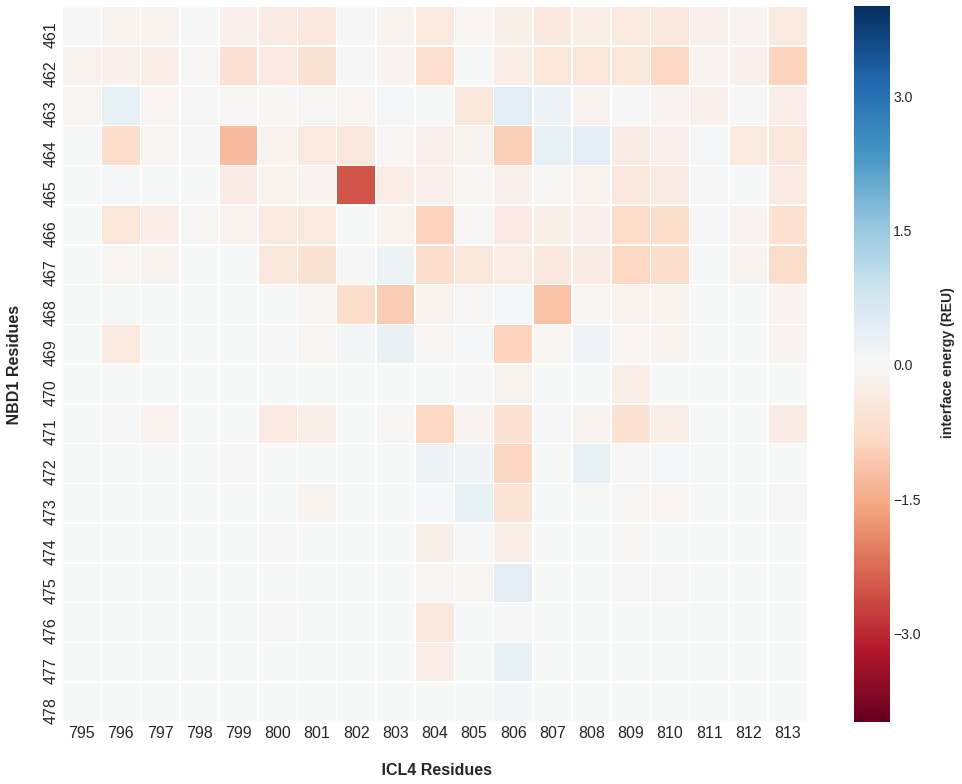

In [11]:
#diverging_colors = sns.color_palette("RdBu", 10)
diverging_colors = sns.color_palette("coolwarm", 10)
fig = plt.figure(figsize=(14,11))
ax=sns.heatmap(result_V2,vmin=-4, vmax=4,xticklabels=1, yticklabels=1, cbar=True,linewidths=.5, annot=False, cmap='RdBu')
ax.collections[0].colorbar.set_label("\n interface energy (REU)", fontsize='14', fontweight='bold')
plt.xlabel('\n ICL4 Residues', fontsize='16', fontweight='bold')
plt.ylabel(' NBD1 Residues \n', fontsize='16', fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
#sns.heatmap((pd.DataFrame(result.sum(axis=0))).transpose(), ax=ax,  annot=True, cmap="RdBu", cbar=False, xticklabels=False, yticklabels=False)
#plt.title('Homo sapiens, control\n', fontsize='28', fontweight='bold')
plt.tight_layout()
#plt.savefig('../heatmap_IA_control.png')
plt.show()